<div style='background-image: url("title01.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px'>
<div style="float: right ; margin: 50px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.7) ; width: 50% ; height: 150px">
<div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , 0.8) ; line-height: 100%">Computers, Waves, Simulations</div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Finite-difference method - first derivative</div>
        </div>
    </div>
</div>

#### This exercise covers the following aspects:

* Calculation of numerical first derivative
* Comparison with analytical solution 
* Dependence of error on space increment

In [29]:
# Import Libraries
using Pkg; gr()
using Plots;
using Statistics;
using Printf;

We initialise a space-dependent sin function

\begin{equation}
f(x)= \sin (k x)
\end{equation}

where the wavenumber k is

\begin{equation}
k = \dfrac{2 \pi}{\lambda}
\end{equation}

and $\lambda$ is wavelength.

In [62]:
# Initial parameters
xmax = 10.0                 # physical domain (m)
nx = 200                    # number of samples    
dx = xmax/(nx-1)            # grid increment dx (m)
x  = collect(0:dx:xmax)     # space coordinates

# Initialization of sin function
l = 20*dx     # wavelength
k = 2*pi/l    # wavenumber
f = sin.(k*x);

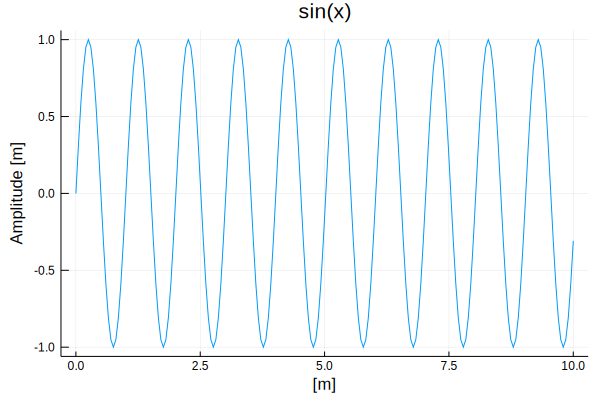

In [16]:
# To avoid testing (with py.test nbval ...) the plotting section 
# NBVAL_IGNORE_OUTPUT
# ----------------------------------------------------------------
# Plot sin function
plot(x, f, legend=false)
xlabel!("[m]")
ylabel!("Amplitude [m]")
title!("sin(x)")
#xlim((0, xmax))

In the cell below we calculate the central finite-difference derivative of f(x) using two points

\begin{equation} 
f^{\prime}(x)=\dfrac{f(x+dx)-f(x-dx)}{2dx}
\end{equation} 

and  compare with the analytical derivative

\begin{equation} 
f^{\prime}(x) = k \cos(k x)
\end{equation} 

In [49]:
# First derivative with two points

# Initiation of numerical and analytical derivatives 
nder = zeros(Float64, nx)          # numerical derivative
ader = zeros(Float64, nx)          # analytical derivative



# Numerical derivative of the given function
for i in 2:nx-1
    nder[i]=(f[i+1]-f[i-1])/(2*dx)
end

# Analytical derivative of the given function
ader = k * cos.(k*x)   

# Exclude boundaries
ader[1] = 0. 
ader[nx] = 0.


# Error (rms) 
rms = sqrt(mean(nder-ader)^2)

0.0009982697005387353

┌ Warning: Skipped marker arg o.
└ @ Plots /home/user/.julia/packages/Plots/jWNMG/src/args.jl:751


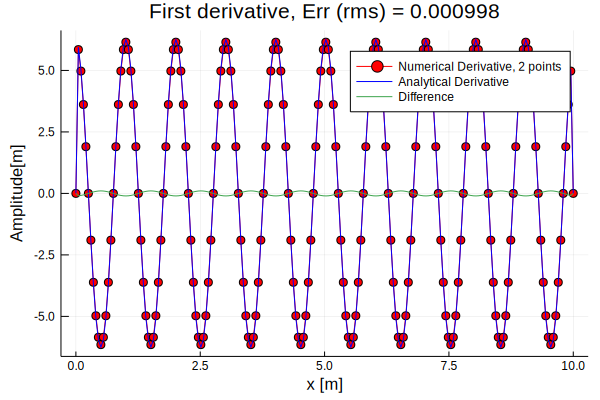

In [50]:
# To avoid testing (with py.test nbval ...) the plotting section 
# NBVAL_IGNORE_OUTPUT
# ----------------------------------------------------------------
# Plotting 
plot(x, nder,label="Numerical Derivative, 2 points", marker='o', color="red")
plot!(x, ader, label="Analytical Derivative",color="blue")
plot!(x, nder-ader, label="Difference")
title!(@sprintf "First derivative, Err (rms) = %.6f " rms )
xlabel!("x [m]")
ylabel!("Amplitude[m]")
#legend!(loc='lower left')


#### The concept of number of points per wavelength

\begin{equation}
n_\lambda = \dfrac{\lambda}{dx}
\end{equation}

How does the error of the numerical derivative change with the number of points per wavelength?

┌ Warning: Skipped marker arg o.
└ @ Plots /home/user/.julia/packages/Plots/jWNMG/src/args.jl:751


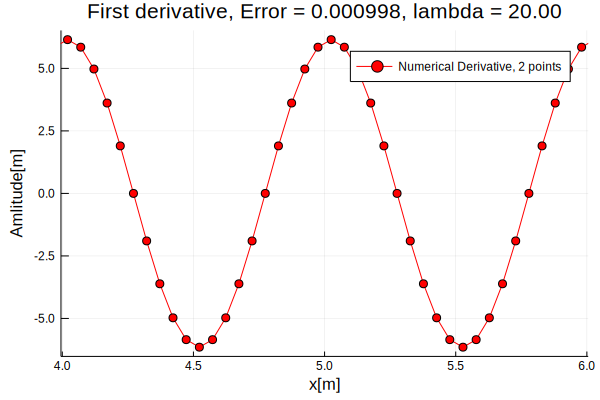

In [51]:
# To avoid testing (with py.test nbval ...) the plotting section 
# NBVAL_IGNORE_OUTPUT
# ----------------------------------------------------------------
# Plotting number of points per wavelength
plot(x, nder,label="Numerical Derivative, 2 points", marker='o', color="red")
title!(@sprintf "First derivative, Error = %.6f, lambda = %.2f " rms l/dx )
xlabel!("x[m]")
ylabel!("Amlitude[m]")
xlims!((xmax/2-l,xmax/2+l))

#### Task: Investigate the error as a function of grid points per wavelength

In [58]:
# Define a range of number of points per wavelength: [nmin=4,5,6 ... ,nmax=40]
# Loop over points, calculate corresponding wavelength and calculate error

# Initialize vectors
nmin = 3
nmax = 16
na = zeros(Float64, nmax-nmin+1)    # Vector with number of points per wavelength
err = zeros(Float64, nmax-nmin+1)    # Vector with error

j = 1  # array index


# Loop through finite-difference derivative calculation
for n in nmin:nmax
        
    na[j] = n
    
    # Initialize sin function
    l = na[j]*dx  # wavelength
    k = 2*pi/l    # wavenumber
    f = sin.(k*x)

    # Numerical derivative of the sin function
    for i in 2: nx-1
        nder[i]=(f[i+1]-f[i-1])/(2*dx)
    end

    # Analytical derivative of the sin function
    ader = k*cos.(k*x)   
    
    # Exclude boundaries
    ader[1]  = 0.
    ader[nx] = 0.

    i0 = Int(nx/2)
    
    # Error (rms) 
    err[j] = (nder[i0]-ader[i0])^2/ader[i0]^2 * 100
    
    j = j+1   # array index
end

345678910111213141516

┌ Warning: Skipped marker arg o.
└ @ Plots /home/user/.julia/packages/Plots/jWNMG/src/args.jl:751


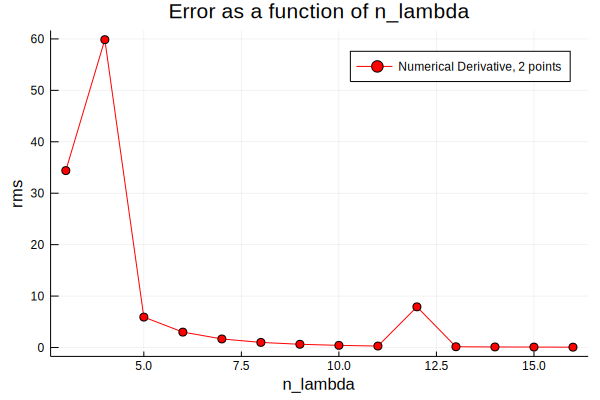

In [61]:
# To avoid testing (with py.test nbval ...) the plotting section 
# NBVAL_IGNORE_OUTPUT
# ----------------------------------------------------------------
# Plotting error as function of number of points per wavelength
plot(na,err,label="Numerical Derivative, 2 points", marker='o', color="red")
title!("Error as a function of n_lambda" )
xlabel!("n_lambda")
ylabel!("rms")


### Conclusions

* 2-point finite-difference approximations can provide  estimates of the 1st derivative of a function
* The accuracy depends on the "number of points per wavelength", i.e., how well we sample the original function
* The more points we use the more accurate is the derivative approximation